In [1]:
import pandas as pd
import numpy as np

# Import and Clean Dock Location Data

In [110]:
docks = pd.read_csv('cluster_alt.csv')
docks

,dock_id,latitude,longitude,borough,zip_code,total_docks
0,521.0,40.750673,-73.994652,Manhattan,10001,67.0
1,224.0,40.711464,-74.005524,Manhattan,10038,31.0
2,419.0,40.695807,-73.973556,Brooklyn,11205,25.0
3,454.0,40.754557,-73.965930,Manhattan,10022,35.0
4,337.0,40.703799,-74.008387,Manhattan,10005,37.0
...,...,...,...,...,...,...
1426,NaN,40.774798,-73.903787,Queens,11101,NaN
1427,NaN,40.776168,-73.910485,Queens,11101,NaN
1428,NaN,40.646377,-74.023087,Brooklyn,11220,NaN
1429,NaN,40.755467,-73.986536,Manhattan,10036,NaN


In [111]:
docks = docks[docks['dock_id'].notnull()]
docks.dock_id = docks.dock_id.apply(lambda x : int(x))
docks

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,dock_id,latitude,longitude,borough,zip_code,total_docks
0,521,40.750673,-73.994652,Manhattan,10001,67.0
1,224,40.711464,-74.005524,Manhattan,10038,31.0
2,419,40.695807,-73.973556,Brooklyn,11205,25.0
3,454,40.754557,-73.965930,Manhattan,10022,35.0
4,337,40.703799,-74.008387,Manhattan,10005,37.0
...,...,...,...,...,...,...
1238,3509,40.801194,-73.950074,Manhattan,10026,31.0
1240,3394,40.676999,-74.006471,Brooklyn,112321,21.0
1241,3493,40.799139,-73.938915,Manhattan,10035,31.0
1353,3488,45.506364,-73.569463,Ville-Marie,H3A 1N9,5.0


In [112]:
docks = docks[docks.borough.isin(['Manhattan', 'Queens', 'Brooklyn'])]
docks

,dock_id,latitude,longitude,borough,zip_code,total_docks
0,521,40.750673,-73.994652,Manhattan,10001,67.0
1,224,40.711464,-74.005524,Manhattan,10038,31.0
2,419,40.695807,-73.973556,Brooklyn,11205,25.0
3,454,40.754557,-73.965930,Manhattan,10022,35.0
4,337,40.703799,-74.008387,Manhattan,10005,37.0
...,...,...,...,...,...,...
1236,3454,40.710369,-73.947060,Brooklyn,11222,24.0
1237,3496,40.792327,-73.938300,Manhattan,10029,25.0
1238,3509,40.801194,-73.950074,Manhattan,10026,31.0
1240,3394,40.676999,-74.006471,Brooklyn,112321,21.0


In [113]:
docks[docks.zip_code == '112321']

,dock_id,latitude,longitude,borough,zip_code,total_docks
316,3342,40.677775,-74.009461,Brooklyn,112321,23.0
731,3182,40.686931,-74.016966,Manhattan,112321,42.0
736,3347,40.677343,-74.012751,Brooklyn,112321,21.0
762,3352,40.672672,-74.008795,Brooklyn,112321,21.0
1240,3394,40.676999,-74.006471,Brooklyn,112321,21.0


In [114]:
docks.zip_code.replace({'100036': '10036', '100014': '10014', '112321': '11231'}, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [115]:
docks.zip_code = docks.zip_code.apply(lambda x : str(x).split('-')[0])
docks.zip_code = docks.zip_code.apply(lambda x : str(x).split(':')[0])
docks.zip_code.unique()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['10001', '10038', '11205', '10022', '10005', '10002', '10010',
       '11238', '10024', '10011', '10003', '10065', '10018', '10014',
       '10007', '11201', '10111', '10153', '10019', '10023', '10016',
       '11249', '10017', '10025', '10012', '10036', '10029', '10037',
       '10028', '11217', '10021', '10004', '10009', '10069', '11231',
       '11207', '11221', '11101', '11206', '11222', '10282', '11109',
       '11102', '10013', '11105', '10026', '11215', '11211', '11216',
       '10035', '11213', '11106', '11251', '10075', '10128', '11227',
       '10027', '11232', '10129', '11237', '10045', '10280', '11225',
       '11233', 'nan', '10155', '10278', '10000', '10041', '11208',
       '10105', '10055', '10275', '11235', '10040'], dtype=object)

In [116]:
docks.reset_index(inplace = True)

In [117]:
docks[docks.zip_code == 'nan']

,index,dock_id,latitude,longitude,borough,zip_code,total_docks
382,618,487,40.733143,-73.975739,Manhattan,nan,38.0
444,715,367,40.758281,-73.970694,Manhattan,nan,34.0
521,977,524,40.755273,-73.983169,Manhattan,nan,57.0


In [120]:
docks.drop(columns = 'index', inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [123]:
docks

,dock_id,latitude,longitude,borough,zip_code,total_docks
0,521,40.750673,-73.994652,Manhattan,10001,67.0
1,224,40.711464,-74.005524,Manhattan,10038,31.0
2,419,40.695807,-73.973556,Brooklyn,11205,25.0
3,454,40.754557,-73.965930,Manhattan,10022,35.0
4,337,40.703799,-74.008387,Manhattan,10005,37.0
...,...,...,...,...,...,...
728,3454,40.710369,-73.947060,Brooklyn,11222,24.0
729,3496,40.792327,-73.938300,Manhattan,10029,25.0
730,3509,40.801194,-73.950074,Manhattan,10026,31.0
731,3394,40.676999,-74.006471,Brooklyn,11231,21.0


# Bring Bus Stop and Subway Station Location Data

In [27]:
import pickle
full_location = pickle.load(open('../dash_app/data/dock_train_bus_df.pkl', 'rb'))
full_location

,latitude,longitude,type
0,40.752,-73.989,bike
1,40.750977,-73.987654,bike
2,40.707,-73.968,bike
3,40.707645,-73.968415,bike
4,40.708273,-73.968341,bike
...,...,...,...
3423,40.645357,-74.092991,bus
3424,40.5603,-74.12039,bus
3425,40.56044,-74.11977,bus
3426,40.6438,-74.0755,bus


In [10]:
bus_stops = full_location[full_location['type'] == 'bus']
bus_stops

,latitude,longitude,type
0,40.706812,-73.947831,bus
1,40.719097,-73.945162,bus
2,40.702976,-73.945783,bus
3,40.720195,-73.940836,bus
4,40.69344,-73.969795,bus
...,...,...,...
3423,40.645357,-74.092991,bus
3424,40.5603,-74.12039,bus
3425,40.56044,-74.11977,bus
3426,40.6438,-74.0755,bus


In [125]:
subway_stops = full_location[full_location['type'] == 'train']
subway_stops

,latitude,longitude,type
0,40.73005400028978,-73.99106999861966,train
1,40.71880300107709,-74.00019299927328,train
2,40.76172799961419,-73.98384899986625,train
3,40.68086213682956,-73.97499915116808,train
4,40.66471445143568,-73.89488591154061,train
...,...,...,...
468,40.57728100006751,-73.9812359981396,train
469,40.75544635961596,-74.00219709442206,train
470,40.76880251014895,-73.95836178682246,train
471,40.77786104333163,-73.95177090964917,train


# Create Locations for 5 Central business districts

In [129]:
cbd = {'name' : ['grand_central', 'penn_st', 'stock_x', 'downtown_bk', 'lic'],
     'lat' : [40.75282776365375, 40.75081181051165, 40.707350859897424, 40.69327764340939, 40.75138120431904],
     'long' : [-73.97704451134803, -73.99311130579017, -74.01005155125219, -73.98563121505435, -73.93848428065934]}
cbd = pd.DataFrame(cbd)
cbd

,name,lat,long
0,grand_central,40.752828,-73.977045
1,penn_st,40.750812,-73.993111
2,stock_x,40.707351,-74.010052
3,downtown_bk,40.693278,-73.985631
4,lic,40.751381,-73.938484


In [165]:
df = docks.copy()

In [166]:
df

,dock_id,latitude,longitude,borough,zip_code,total_docks
0,521,40.750673,-73.994652,Manhattan,10001,67.0
1,224,40.711464,-74.005524,Manhattan,10038,31.0
2,419,40.695807,-73.973556,Brooklyn,11205,25.0
3,454,40.754557,-73.965930,Manhattan,10022,35.0
4,337,40.703799,-74.008387,Manhattan,10005,37.0
...,...,...,...,...,...,...
728,3454,40.710369,-73.947060,Brooklyn,11222,24.0
729,3496,40.792327,-73.938300,Manhattan,10029,25.0
730,3509,40.801194,-73.950074,Manhattan,10026,31.0
731,3394,40.676999,-74.006471,Brooklyn,11231,21.0


# Get distance from each Dock to CBD, Subway and Bus

In [132]:
from geopy.distance import distance

In [155]:
distance((40.750673, -73.994652), (40.752828, -73.977045)).miles

0.935814301412522

In [167]:
list1 = []
for row in df.iloc:
    dist_list = []
    for x in cbd.iloc:
        dist = (distance((row.latitude, row.longitude), (row.latitude, x.long)).miles 
        + distance((row.latitude, x.long), (x.lat, x.long)).miles)
        dist_list.append(dist)
    cbd_dist = min(dist_list)
    list1.append(cbd_dist)
df['cbd_distance'] = list1
    
pd.DataFrame(df)

,dock_id,latitude,longitude,borough,zip_code,total_docks,cbd_distance
0,521,40.750673,-73.994652,Manhattan,10001,67.0,0.090385
1,224,40.711464,-74.005524,Manhattan,10038,31.0,0.521503
2,419,40.695807,-73.973556,Brooklyn,11205,25.0,0.808726
3,454,40.754557,-73.965930,Manhattan,10022,35.0,0.702564
4,337,40.703799,-74.008387,Manhattan,10005,37.0,0.332495
...,...,...,...,...,...,...,...
728,3454,40.710369,-73.947060,Brooklyn,11222,24.0,3.204606
729,3496,40.792327,-73.938300,Manhattan,10029,25.0,2.835059
730,3509,40.801194,-73.950074,Manhattan,10026,31.0,4.044936
731,3394,40.676999,-74.006471,Brooklyn,11231,21.0,2.218043


In [169]:
df = pd.DataFrame(df)
df

,dock_id,latitude,longitude,borough,zip_code,total_docks,cbd_distance
0,521,40.750673,-73.994652,Manhattan,10001,67.0,0.090385
1,224,40.711464,-74.005524,Manhattan,10038,31.0,0.521503
2,419,40.695807,-73.973556,Brooklyn,11205,25.0,0.808726
3,454,40.754557,-73.965930,Manhattan,10022,35.0,0.702564
4,337,40.703799,-74.008387,Manhattan,10005,37.0,0.332495
...,...,...,...,...,...,...,...
728,3454,40.710369,-73.947060,Brooklyn,11222,24.0,3.204606
729,3496,40.792327,-73.938300,Manhattan,10029,25.0,2.835059
730,3509,40.801194,-73.950074,Manhattan,10026,31.0,4.044936
731,3394,40.676999,-74.006471,Brooklyn,11231,21.0,2.218043


In [172]:
list2 = []
for row in df.iloc:
    dist_list = []
    for x in subway_stops.iloc:
        dist = (distance((row.latitude, row.longitude), (row.latitude, x.longitude)).miles 
        + distance((row.latitude, x.longitude), (x.latitude, x.longitude)).miles)
        dist_list.append(dist)
    sub_dist = min(dist_list)
    list2.append(sub_dist)
df['subway_distance'] = list2
    
pd.DataFrame(df)

,dock_id,latitude,longitude,borough,zip_code,total_docks,cbd_distance,subway_distance
0,521,40.750673,-73.994652,Manhattan,10001,67.0,0.090385,0.177500
1,224,40.711464,-74.005524,Manhattan,10038,31.0,0.521503,0.183653
2,419,40.695807,-73.973556,Brooklyn,11205,25.0,0.808726,0.689407
3,454,40.754557,-73.965930,Manhattan,10022,35.0,0.702564,0.365768
4,337,40.703799,-74.008387,Manhattan,10005,37.0,0.332495,0.245965
...,...,...,...,...,...,...,...,...
728,3454,40.710369,-73.947060,Brooklyn,11222,24.0,3.204606,0.395150
729,3496,40.792327,-73.938300,Manhattan,10029,25.0,2.835059,0.497847
730,3509,40.801194,-73.950074,Manhattan,10026,31.0,4.044936,0.085927
731,3394,40.676999,-74.006471,Brooklyn,11231,21.0,2.218043,0.787509


In [173]:
df = pd.DataFrame(df)
df

,dock_id,latitude,longitude,borough,zip_code,total_docks,cbd_distance,subway_distance
0,521,40.750673,-73.994652,Manhattan,10001,67.0,0.090385,0.177500
1,224,40.711464,-74.005524,Manhattan,10038,31.0,0.521503,0.183653
2,419,40.695807,-73.973556,Brooklyn,11205,25.0,0.808726,0.689407
3,454,40.754557,-73.965930,Manhattan,10022,35.0,0.702564,0.365768
4,337,40.703799,-74.008387,Manhattan,10005,37.0,0.332495,0.245965
...,...,...,...,...,...,...,...,...
728,3454,40.710369,-73.947060,Brooklyn,11222,24.0,3.204606,0.395150
729,3496,40.792327,-73.938300,Manhattan,10029,25.0,2.835059,0.497847
730,3509,40.801194,-73.950074,Manhattan,10026,31.0,4.044936,0.085927
731,3394,40.676999,-74.006471,Brooklyn,11231,21.0,2.218043,0.787509


In [174]:
list3 = []
for row in df.iloc:
    dist_list = []
    for x in bus_stops.iloc:
        dist = (distance((row.latitude, row.longitude), (row.latitude, x.longitude)).miles 
        + distance((row.latitude, x.longitude), (x.latitude, x.longitude)).miles)
        dist_list.append(dist)
    bus_dist = min(dist_list)
    list3.append(bus_dist)
df['bus_distance'] = list3
    
pd.DataFrame(df)

,dock_id,latitude,longitude,borough,zip_code,total_docks,cbd_distance,subway_distance,bus_distance
0,521,40.750673,-73.994652,Manhattan,10001,67.0,0.090385,0.177500,0.122528
1,224,40.711464,-74.005524,Manhattan,10038,31.0,0.521503,0.183653,0.058327
2,419,40.695807,-73.973556,Brooklyn,11205,25.0,0.808726,0.689407,0.216122
3,454,40.754557,-73.965930,Manhattan,10022,35.0,0.702564,0.365768,0.079522
4,337,40.703799,-74.008387,Manhattan,10005,37.0,0.332495,0.245965,0.063455
...,...,...,...,...,...,...,...,...,...
728,3454,40.710369,-73.947060,Brooklyn,11222,24.0,3.204606,0.395150,0.230867
729,3496,40.792327,-73.938300,Manhattan,10029,25.0,2.835059,0.497847,0.114441
730,3509,40.801194,-73.950074,Manhattan,10026,31.0,4.044936,0.085927,0.082564
731,3394,40.676999,-74.006471,Brooklyn,11231,21.0,2.218043,0.787509,0.230107


In [175]:
df = pd.DataFrame(df)
df

,dock_id,latitude,longitude,borough,zip_code,total_docks,cbd_distance,subway_distance,bus_distance
0,521,40.750673,-73.994652,Manhattan,10001,67.0,0.090385,0.177500,0.122528
1,224,40.711464,-74.005524,Manhattan,10038,31.0,0.521503,0.183653,0.058327
2,419,40.695807,-73.973556,Brooklyn,11205,25.0,0.808726,0.689407,0.216122
3,454,40.754557,-73.965930,Manhattan,10022,35.0,0.702564,0.365768,0.079522
4,337,40.703799,-74.008387,Manhattan,10005,37.0,0.332495,0.245965,0.063455
...,...,...,...,...,...,...,...,...,...
728,3454,40.710369,-73.947060,Brooklyn,11222,24.0,3.204606,0.395150,0.230867
729,3496,40.792327,-73.938300,Manhattan,10029,25.0,2.835059,0.497847,0.114441
730,3509,40.801194,-73.950074,Manhattan,10026,31.0,4.044936,0.085927,0.082564
731,3394,40.676999,-74.006471,Brooklyn,11231,21.0,2.218043,0.787509,0.230107


# Create Pickle to Save Distances DataFrame, then label encode categorical columns

In [176]:
import pickle
pickle.dump(df, open('cluster_alt_df.pkl', 'wb'))

In [177]:
df.dtypes

dock_id              int64
latitude           float64
longitude          float64
borough             object
zip_code            object
total_docks        float64
cbd_distance       float64
subway_distance    float64
bus_distance       float64
dtype: object

In [181]:
df_cat = df.select_dtypes('object')
df_cat

,borough,zip_code
0,Manhattan,10001
1,Manhattan,10038
2,Brooklyn,11205
3,Manhattan,10022
4,Manhattan,10005
...,...,...
728,Brooklyn,11222
729,Manhattan,10029
730,Manhattan,10026
731,Brooklyn,11231


In [179]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [183]:
enc = oe.fit_transform(df_cat)
df_cat_enc = pd.DataFrame(enc, columns = df_cat.columns)
df_cat_enc

,borough,zip_code
0,1.0,1.0
1,1.0,29.0
2,0.0,53.0
3,1.0,18.0
4,1.0,5.0
...,...,...
728,0.0,63.0
729,1.0,25.0
730,1.0,22.0
731,0.0,66.0


In [189]:
df_num = df.drop(columns = ['borough', 'zip_code', 'latitude', 'longitude'])
df_num

,dock_id,total_docks,cbd_distance,subway_distance,bus_distance
0,521,67.0,0.090385,0.177500,0.122528
1,224,31.0,0.521503,0.183653,0.058327
2,419,25.0,0.808726,0.689407,0.216122
3,454,35.0,0.702564,0.365768,0.079522
4,337,37.0,0.332495,0.245965,0.063455
...,...,...,...,...,...
728,3454,24.0,3.204606,0.395150,0.230867
729,3496,25.0,2.835059,0.497847,0.114441
730,3509,31.0,4.044936,0.085927,0.082564
731,3394,21.0,2.218043,0.787509,0.230107


In [191]:
clust_df = pd.concat([df_num, df_cat_enc], axis = 1)
clust_df

,dock_id,total_docks,cbd_distance,subway_distance,bus_distance,borough,zip_code
0,521,67.0,0.090385,0.177500,0.122528,1.0,1.0
1,224,31.0,0.521503,0.183653,0.058327,1.0,29.0
2,419,25.0,0.808726,0.689407,0.216122,0.0,53.0
3,454,35.0,0.702564,0.365768,0.079522,1.0,18.0
4,337,37.0,0.332495,0.245965,0.063455,1.0,5.0
...,...,...,...,...,...,...,...
728,3454,24.0,3.204606,0.395150,0.230867,0.0,63.0
729,3496,25.0,2.835059,0.497847,0.114441,1.0,25.0
730,3509,31.0,4.044936,0.085927,0.082564,1.0,22.0
731,3394,21.0,2.218043,0.787509,0.230107,0.0,66.0


In [193]:
clust_df.set_index('dock_id', inplace = True)

In [194]:
clust_df

,total_docks,cbd_distance,subway_distance,bus_distance,borough,zip_code
dock_id,,,,,,
521,67.0,0.090385,0.177500,0.122528,1.0,1.0
224,31.0,0.521503,0.183653,0.058327,1.0,29.0
419,25.0,0.808726,0.689407,0.216122,0.0,53.0
454,35.0,0.702564,0.365768,0.079522,1.0,18.0
337,37.0,0.332495,0.245965,0.063455,1.0,5.0
...,...,...,...,...,...,...
3454,24.0,3.204606,0.395150,0.230867,0.0,63.0
3496,25.0,2.835059,0.497847,0.114441,1.0,25.0
3509,31.0,4.044936,0.085927,0.082564,1.0,22.0


# Train Clusters

In [195]:
from sklearn.cluster import KMeans

In [196]:
km = KMeans(random_state=0)

In [197]:
def elbow_plot(k,data):
    inertia = []
    clusters = range(1,k)
    for cluster in clusters:
        kmeans_model = KMeans()
        kmeans_model.set_params(n_clusters=cluster, random_state = 5)
        kmeans_model.fit(data)
        inertia.append(kmeans_model.inertia_)
    plt.plot(clusters, inertia, marker= "x")
    plt.xlabel('k')
    plt.xticks(np.arange(k))
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

In [198]:
def kmeans_cluster_class(k, data):
    df = data
    kmeans_model = KMeans()
    kmeans_model.set_params(n_clusters = k, random_state = 5)
    kmean = kmeans_model.fit_predict(df)
    df['cluster'] = kmean
    
    return df

In [200]:
import matplotlib.pyplot as plt

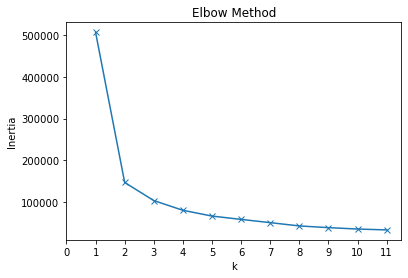

In [201]:
elbow_plot(12,clust_df)

In [202]:
kmeans_cluster_class(4, clust_df)

,total_docks,cbd_distance,subway_distance,bus_distance,borough,zip_code,cluster
dock_id,,,,,,,
521,67.0,0.090385,0.177500,0.122528,1.0,1.0,3
224,31.0,0.521503,0.183653,0.058327,1.0,29.0,0
419,25.0,0.808726,0.689407,0.216122,0.0,53.0,1
454,35.0,0.702564,0.365768,0.079522,1.0,18.0,0
337,37.0,0.332495,0.245965,0.063455,1.0,5.0,2
...,...,...,...,...,...,...,...
3454,24.0,3.204606,0.395150,0.230867,0.0,63.0,1
3496,25.0,2.835059,0.497847,0.114441,1.0,25.0,0
3509,31.0,4.044936,0.085927,0.082564,1.0,22.0,0


In [204]:
def cluster_geography(k, data, data2):
    df = kmeans_cluster_class(k, data)
    copy = df.copy(deep = True)
    copy = copy.reset_index()
    copy = copy.merge(data2, on = 'dock_id')
    
    px.scatter_mapbox(copy,
            lat = 'latitude',
            lon = 'longitude',
            color = 'cluster',
            mapbox_style = 'carto-positron'
            #,color_continuous_scale=['red','orange','yellow','green','blue','purple','black']
            ).show()

In [206]:
import plotly.express as px

In [208]:
cluster_geography(6, clust_df, df[['dock_id', 'latitude', 'longitude']])

In [212]:
clusters = kmeans_cluster_class(4, clust_df)
clusters.reset_index(inplace = True)
clusters = clusters[['dock_id', 'cluster']]
clusters

,dock_id,cluster
0,521,1
1,224,1
2,419,1
3,454,1
4,337,1
...,...,...
728,3454,0
729,3496,0
730,3509,0
731,3394,0


In [213]:
pickle.dump(clusters, open('clusters.pkl', 'wb'))